Multiple Linear Regression Assignment:

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of car prices


Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 


Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

Step 1: Reading and Understanding the Data
Let us first read the required libraries and import the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
carprice = pd.read_csv("C://Users//AjayPasi//Downloads//CarPrice_Assignment.csv")
carprice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
carprice.shape

(205, 26)

In [4]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
carprice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

    If there is some obvious multicollinearity going on, this is the first place to catch it
    Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


visualising the numerical variable
Let's make a pairplot of all the numeric variables

<Figure size 2160x1296 with 0 Axes>

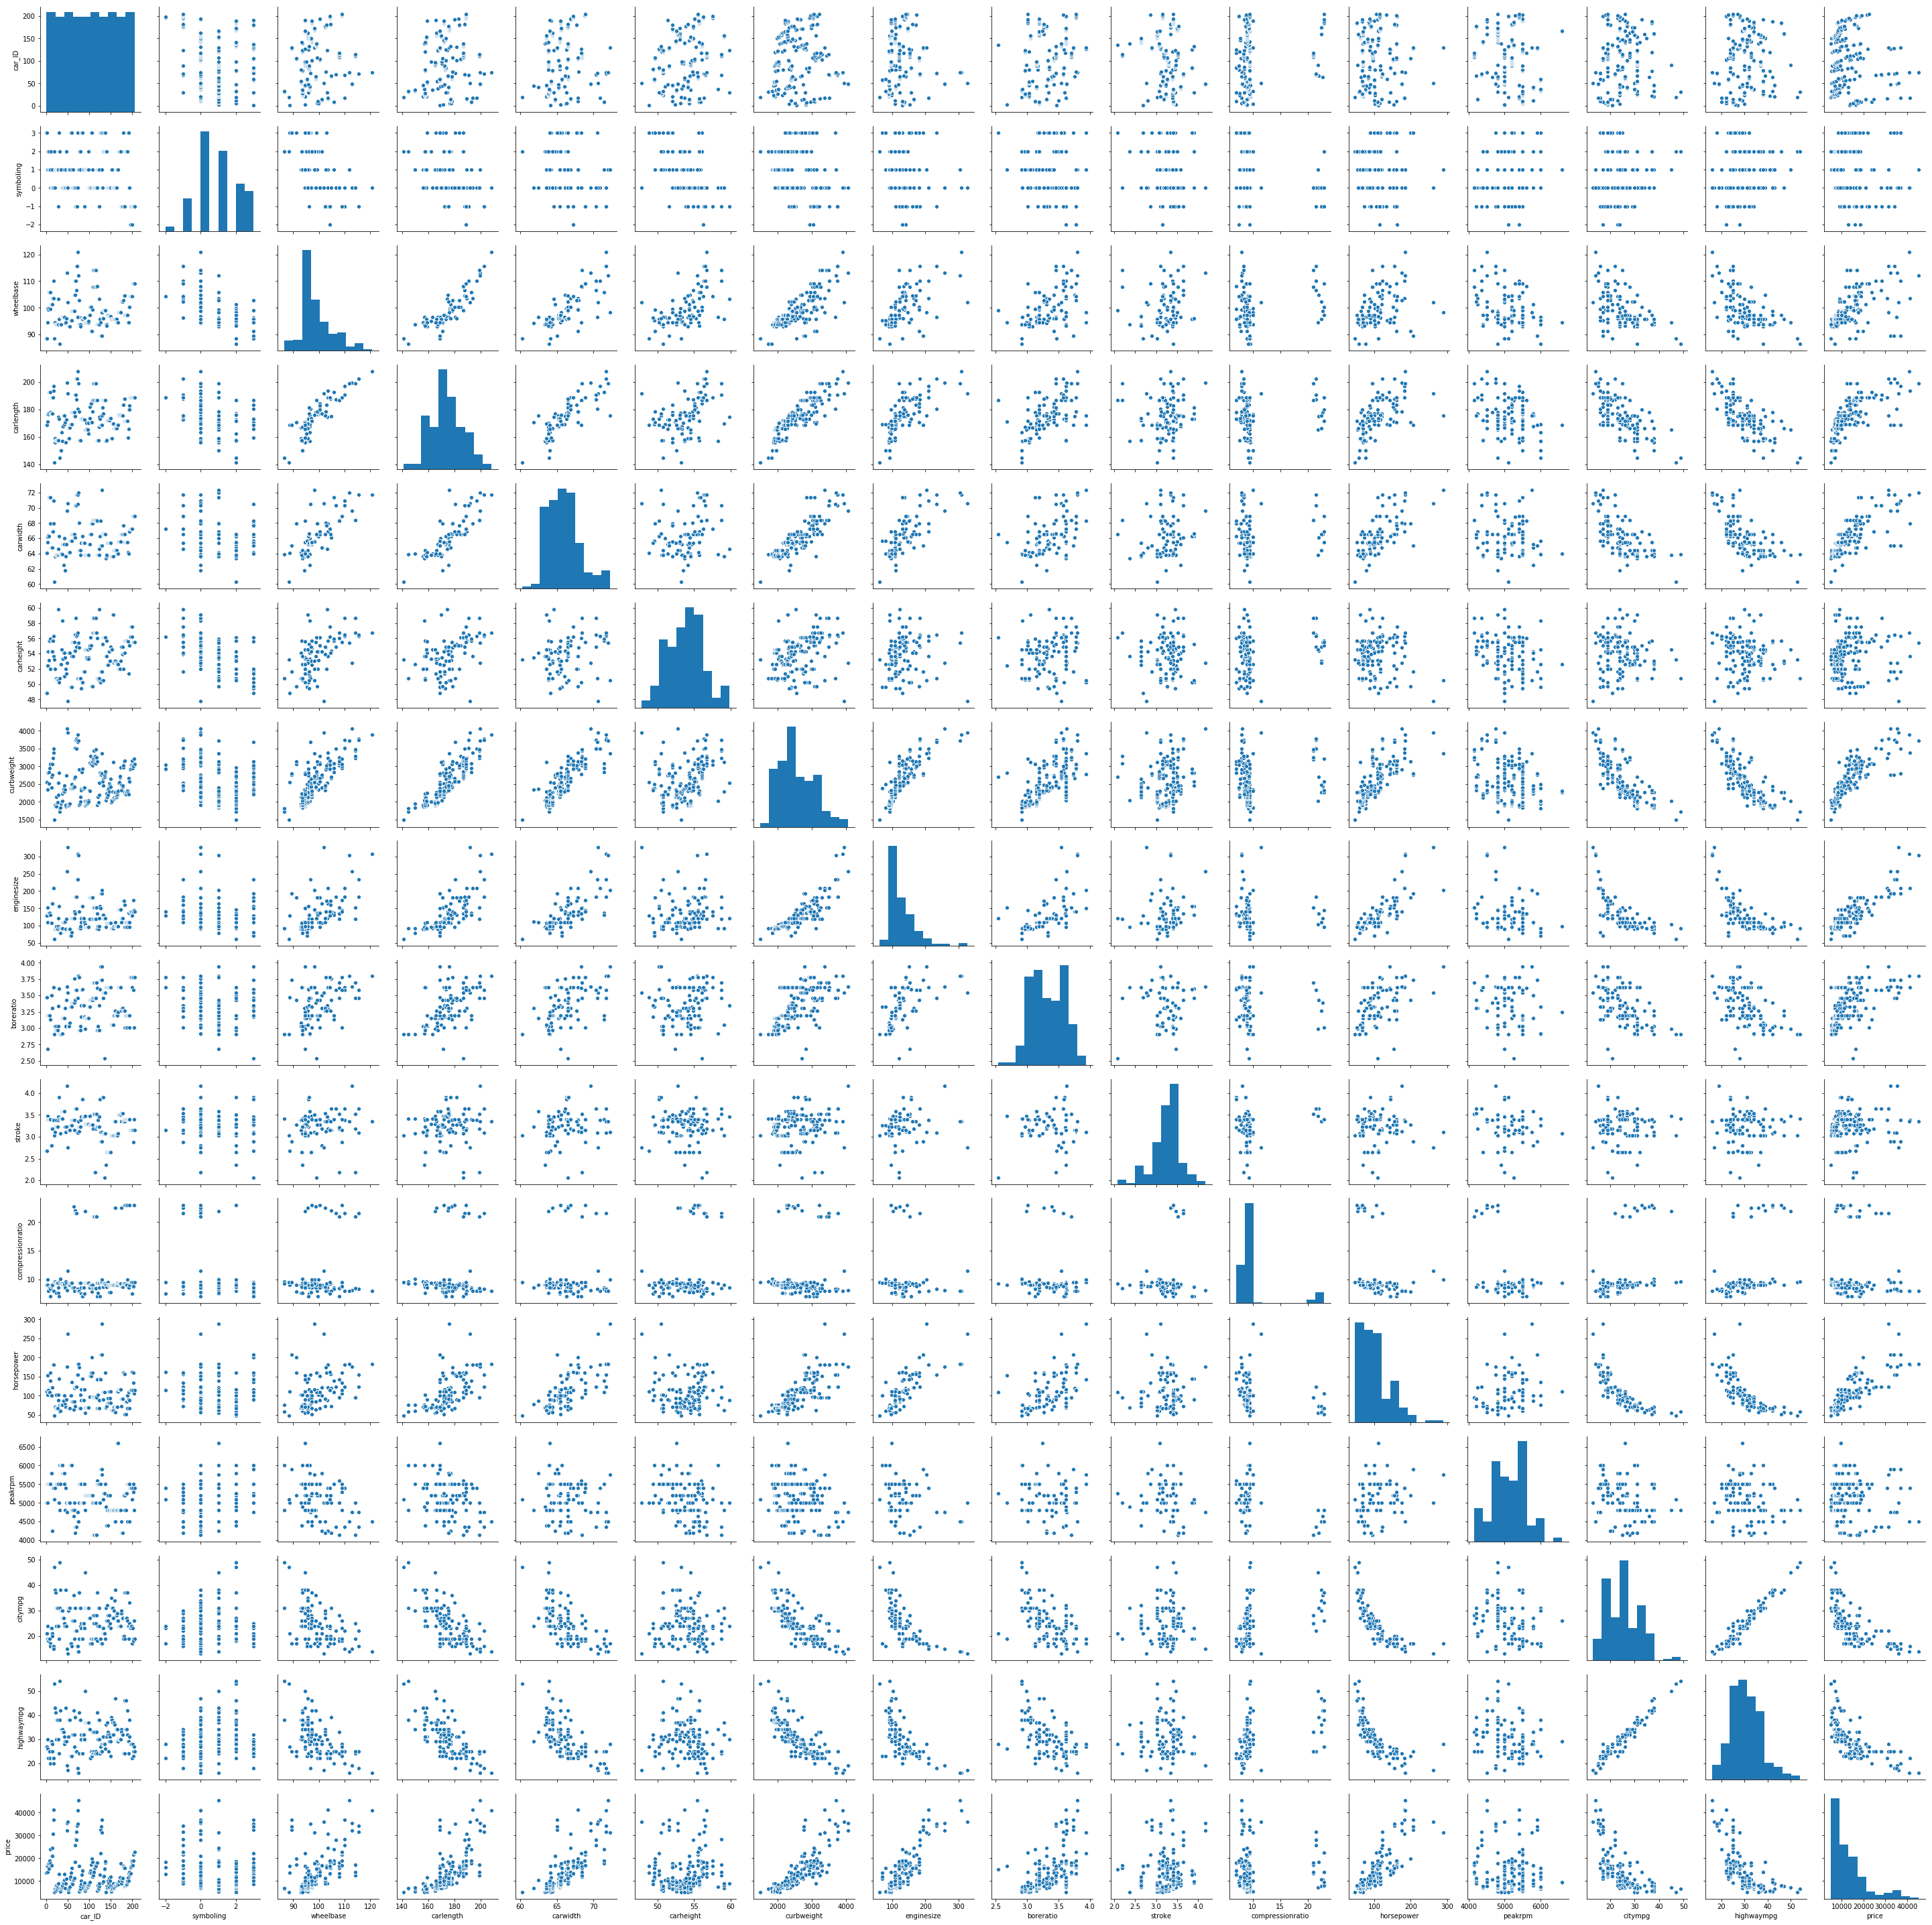

In [6]:
plt.figure(figsize=(30,18))
sns.pairplot(carprice)
plt.show()

Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

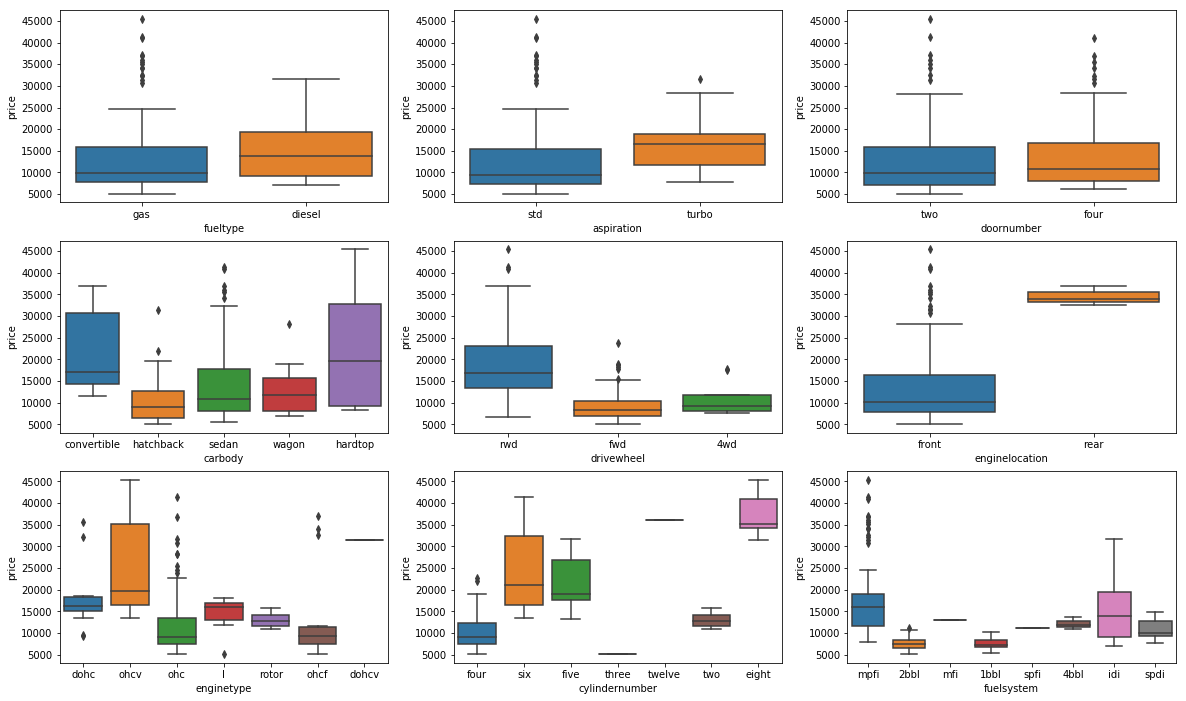

In [7]:
plt.figure(figsize=(20,12))


plt.subplot(3,3,1)
sns.boxplot(x='fueltype' , y='price', data=carprice)

plt.subplot(3,3,2)
sns.boxplot(x='aspiration' , y='price', data=carprice)

plt.subplot(3,3,3)
sns.boxplot(x='doornumber' , y='price', data=carprice)

plt.subplot(3,3,4)
sns.boxplot(x='carbody' , y='price', data=carprice)

plt.subplot(3,3,5)
sns.boxplot(x='drivewheel' , y='price', data=carprice)

plt.subplot(3,3,6)
sns.boxplot(x='enginelocation' , y='price', data=carprice)

plt.subplot(3,3,7)
sns.boxplot(x='enginetype' , y='price', data=carprice)

plt.subplot(3,3,8)
sns.boxplot(x='cylindernumber' , y='price', data=carprice)

plt.subplot(3,3,9)
sns.boxplot(x='fuelsystem' , y='price', data=carprice)

Step 3: Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building. 

In [8]:
# Splitting the column CarName into two columns Company and Model
new=carprice["CarName"].str.split(" ", n=1, expand=True)
carprice["Company"]=new[0]
carprice["Model"]=new[1]
carprice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
0  convertible        rwd          front       88.6  ...       3.47    2.68   
1  convertible        rwd          front       88.6  ...       3.47    2.68   
2    hatchback        rwd          front       94.5  ...       2.68    3.47   
3        sedan        fwd          front       99.8  ...       3.19    3.40   
4        sedan        4wd          front       99.4  ...       3.19    3.40   

   compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0               9.0         111    5000      21          27  13495.0   
1               9.0         111    5000      21          27  16500.0   
2               9.0         154    5000      19          26  16500.0   
3              10.0         102    5500      24          30  13950.0   
4               8.0         115    5500      18          22  17450.0   

       Company         Model  
0  alfa-romero        giulia  
1  alfa-romero       stelvio  
2  alfa-romero  Quadrifoglio  
3         audi        100 ls  
4         audi         100ls  

[5 rows x 28 columns]

In [9]:
#Dropping the column CarName
carprice.drop(['CarName'],axis=1,inplace=True)
carprice.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
0          front       88.6      168.8  ...       3.47    2.68   
1          front       88.6      168.8  ...       3.47    2.68   
2          front       94.5      171.2  ...       2.68    3.47   
3          front       99.8      176.6  ...       3.19    3.40   
4          front       99.4      176.6  ...       3.19    3.40   

   compressionratio horsepower peakrpm  citympg highwaympg    price  \
0               9.0        111    5000       21         27  13495.0   
1               9.0        111    5000       21         27  16500.0   
2               9.0        154    5000       19         26  16500.0   
3              10.0        102    5500       24         30  13950.0   
4               8.0        115    5500       18         22  17450.0   

       Company         Model  
0  alfa-romero        giulia  
1  alfa-romero       stelvio  
2  alfa-romero  Quadrifoglio  
3         audi        100 ls  
4         audi         100ls  

[5 rows x 27 columns]

You can see that your dataset has many columns with 2 categorical values.
But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [10]:
# we will check how many distinct values are in categorical variable fueltype
carprice.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [11]:
# we will map the categorical variable to binary values 1 & 0 
carprice['fueltype']=carprice['fueltype'].map({'gas': 1 , 'diesel': 0})
carprice.fueltype

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
175    1
176    1
177    1
178    1
179    1
180    1
181    1
182    0
183    1
184    0
185    1
186    1
187    0
188    1
189    1
190    1
191    1
192    0
193    1
194    1
195    1
196    1
197    1
198    1
199    1
200    1
201    1
202    1
203    0
204    1
Name: fueltype, Length: 205, dtype: int64

Similarly one by one we will check how many distinct values are in other categorical variables and will map them to binary values accordingly

In [12]:
# aspiration
carprice.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [13]:
carprice['aspiration']=carprice['aspiration'].map({'std': 1 , 'turbo': 0})
carprice.aspiration.head()

0    1
1    1
2    1
3    1
4    1
Name: aspiration, dtype: int64

In [14]:
# doornumber
carprice.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [15]:
carprice['doornumber']=carprice['doornumber'].map({'four': 1 , 'two': 0})
carprice.doornumber.head()

0    0
1    0
2    0
3    1
4    1
Name: doornumber, dtype: int64

In [16]:
# enginelocation
carprice.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [17]:
carprice['enginelocation']=carprice['enginelocation'].map({'front': 1 , 'rear': 0})
carprice.enginelocation.head()

0    1
1    1
2    1
3    1
4    1
Name: enginelocation, dtype: int64

In [18]:
# check the carprice dataframe now
carprice.head()

car_ID  symboling  fueltype  aspiration  doornumber      carbody  \
0       1          3         1           1           0  convertible   
1       2          3         1           1           0  convertible   
2       3          1         1           1           0    hatchback   
3       4          2         1           1           1        sedan   
4       5          2         1           1           1        sedan   

  drivewheel  enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
0        rwd               1       88.6      168.8  ...       3.47    2.68   
1        rwd               1       88.6      168.8  ...       3.47    2.68   
2        rwd               1       94.5      171.2  ...       2.68    3.47   
3        fwd               1       99.8      176.6  ...       3.19    3.40   
4        4wd               1       99.4      176.6  ...       3.19    3.40   

   compressionratio horsepower peakrpm  citympg highwaympg    price  \
0               9.0        111    5000       21         27  13495.0   
1               9.0        111    5000       21         27  16500.0   
2               9.0        154    5000       19         26  16500.0   
3              10.0        102    5500       24         30  13950.0   
4               8.0        115    5500       18         22  17450.0   

       Company         Model  
0  alfa-romero        giulia  
1  alfa-romero       stelvio  
2  alfa-romero  Quadrifoglio  
3         audi        100 ls  
4         audi         100ls  

[5 rows x 27 columns]

Dummy Variables

Few variables like carbody,drivewheel etc  has more than two levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.


In [19]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'status1'
carprice.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [20]:
status1=pd.get_dummies(carprice['carbody'])

In [21]:
status1.head()

convertible  hardtop  hatchback  sedan  wagon
0            1        0          0      0      0
1            1        0          0      0      0
2            0        0          1      0      0
3            0        0          0      1      0
4            0        0          0      1      0

Now, We don't need five columns.We can drop the concertible column, as the carbody type can be identified with remaining four columns

In [22]:
# Let's drop the first column from status1 df using 'drop_first = True'
status1 = pd.get_dummies(carprice['carbody'], drop_first = True)

In [23]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status1], axis = 1)

In [24]:
# Now let's see the head of our dataframe.

carprice.head()

car_ID  symboling  fueltype  aspiration  doornumber      carbody  \
0       1          3         1           1           0  convertible   
1       2          3         1           1           0  convertible   
2       3          1         1           1           0    hatchback   
3       4          2         1           1           1        sedan   
4       5          2         1           1           1        sedan   

  drivewheel  enginelocation  wheelbase  carlength  ...  peakrpm  citympg  \
0        rwd               1       88.6      168.8  ...     5000       21   
1        rwd               1       88.6      168.8  ...     5000       21   
2        rwd               1       94.5      171.2  ...     5000       19   
3        fwd               1       99.8      176.6  ...     5500       24   
4        4wd               1       99.4      176.6  ...     5500       18   

   highwaympg    price      Company         Model hardtop  hatchback  sedan  \
0          27  13495.0  alfa-romero        giulia       0          0      0   
1          27  16500.0  alfa-romero       stelvio       0          0      0   
2          26  16500.0  alfa-romero  Quadrifoglio       0          1      0   
3          30  13950.0         audi        100 ls       0          0      1   
4          22  17450.0         audi         100ls       0          0      1   

   wagon  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 31 columns]

Similarly for other remaining categorical variable columns having more than two values , We will use dummy variables

In [25]:
#drivewheel
carprice.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [26]:
status2=pd.get_dummies(carprice['drivewheel'])

In [27]:
status2.head()

4wd  fwd  rwd
0    0    0    1
1    0    0    1
2    0    0    1
3    0    1    0
4    1    0    0

In [28]:
status2 = pd.get_dummies(carprice['drivewheel'], drop_first = True)

In [29]:
carprice = pd.concat([carprice, status2], axis = 1)

In [30]:
# Now let's see the head of our dataframe.
carprice.head()

car_ID  symboling  fueltype  aspiration  doornumber      carbody  \
0       1          3         1           1           0  convertible   
1       2          3         1           1           0  convertible   
2       3          1         1           1           0    hatchback   
3       4          2         1           1           1        sedan   
4       5          2         1           1           1        sedan   

  drivewheel  enginelocation  wheelbase  carlength  ...  highwaympg    price  \
0        rwd               1       88.6      168.8  ...          27  13495.0   
1        rwd               1       88.6      168.8  ...          27  16500.0   
2        rwd               1       94.5      171.2  ...          26  16500.0   
3        fwd               1       99.8      176.6  ...          30  13950.0   
4        4wd               1       99.4      176.6  ...          22  17450.0   

       Company         Model hardtop  hatchback sedan  wagon  fwd  rwd  
0  alfa-romero        giulia       0          0     0      0    0    1  
1  alfa-romero       stelvio       0          0     0      0    0    1  
2  alfa-romero  Quadrifoglio       0          1     0      0    0    1  
3         audi        100 ls       0          0     1      0    1    0  
4         audi         100ls       0          0     1      0    0    0  

[5 rows x 33 columns]

In [31]:
# enginetype
carprice.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [32]:
status3=pd.get_dummies(carprice['enginetype'])

In [33]:
status3.head()

dohc  dohcv  l  ohc  ohcf  ohcv  rotor
0     1      0  0    0     0     0      0
1     1      0  0    0     0     0      0
2     0      0  0    0     0     1      0
3     0      0  0    1     0     0      0
4     0      0  0    1     0     0      0

In [34]:
status3 = pd.get_dummies(carprice['enginetype'], drop_first = True)

In [35]:
carprice = pd.concat([carprice, status3], axis = 1)

In [36]:
#cylindernumber
carprice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [37]:
status4=pd.get_dummies(carprice['cylindernumber'])

In [38]:
status4.head()

eight  five  four  six  three  twelve  two
0      0     0     1    0      0       0    0
1      0     0     1    0      0       0    0
2      0     0     0    1      0       0    0
3      0     0     1    0      0       0    0
4      0     1     0    0      0       0    0

In [39]:
status4 = pd.get_dummies(carprice['cylindernumber'], drop_first = True)

In [40]:
carprice = pd.concat([carprice, status4], axis = 1)

In [41]:
#fuelsystem
carprice.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [42]:
status5=pd.get_dummies(carprice['fuelsystem'])

In [43]:
status5.head()

1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0     0     0     0    0    0     1     0     0
1     0     0     0    0    0     1     0     0
2     0     0     0    0    0     1     0     0
3     0     0     0    0    0     1     0     0
4     0     0     0    0    0     1     0     0

In [44]:
status5 = pd.get_dummies(carprice['fuelsystem'], drop_first = True)

In [45]:
carprice = pd.concat([carprice, status5], axis = 1)

In [46]:
#Company
carprice.Company.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
vw              2
maxda           2
Nissan          1
vokswagen       1
mercury         1
porcshce        1
toyouta         1
Name: Company, dtype: int64

In [47]:
status6=pd.get_dummies(carprice['Company'])

In [48]:
status6.head()

Nissan  alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  \
0       0            1     0    0      0          0      0      0      0   
1       0            1     0    0      0          0      0      0      0   
2       0            1     0    0      0          0      0      0      0   
3       0            0     1    0      0          0      0      0      0   
4       0            0     1    0      0          0      0      0      0   

   jaguar  ...  porsche  renault  saab  subaru  toyota  toyouta  vokswagen  \
0       0  ...        0        0     0       0       0        0          0   
1       0  ...        0        0     0       0       0        0          0   
2       0  ...        0        0     0       0       0        0          0   
3       0  ...        0        0     0       0       0        0          0   
4       0  ...        0        0     0       0       0        0          0   

   volkswagen  volvo  vw  
0           0      0   0  
1           0      0   0  
2           0      0   0  
3           0      0   0  
4           0      0   0  

[5 rows x 28 columns]

In [49]:
status6 = pd.get_dummies(carprice['Company'], drop_first = True)

In [50]:
carprice = pd.concat([carprice, status6], axis = 1)

In [51]:
# Now let's see the head of our dataframe.
carprice.head()

car_ID  symboling  fueltype  aspiration  doornumber      carbody  \
0       1          3         1           1           0  convertible   
1       2          3         1           1           0  convertible   
2       3          1         1           1           0    hatchback   
3       4          2         1           1           1        sedan   
4       5          2         1           1           1        sedan   

  drivewheel  enginelocation  wheelbase  carlength  ...  porsche  renault  \
0        rwd               1       88.6      168.8  ...        0        0   
1        rwd               1       88.6      168.8  ...        0        0   
2        rwd               1       94.5      171.2  ...        0        0   
3        fwd               1       99.8      176.6  ...        0        0   
4        4wd               1       99.4      176.6  ...        0        0   

   saab subaru toyota  toyouta vokswagen  volkswagen  volvo  vw  
0     0      0      0        0         0           0      0   0  
1     0      0      0        0         0           0      0   0  
2     0      0      0        0         0           0      0   0  
3     0      0      0        0         0           0      0   0  
4     0      0      0        0         0           0      0   0  

[5 rows x 79 columns]

In [52]:
# Drop all the columns for which we have created the dummies.
carprice.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','Company'], axis = 1, inplace = True)

In [53]:
carprice.head()

car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
0       1          3         1           1           0               1   
1       2          3         1           1           0               1   
2       3          1         1           1           0               1   
3       4          2         1           1           1               1   
4       5          2         1           1           1               1   

   wheelbase  carlength  carwidth  carheight  ...  porsche  renault  saab  \
0       88.6      168.8      64.1       48.8  ...        0        0     0   
1       88.6      168.8      64.1       48.8  ...        0        0     0   
2       94.5      171.2      65.5       52.4  ...        0        0     0   
3       99.8      176.6      66.2       54.3  ...        0        0     0   
4       99.4      176.6      66.4       54.3  ...        0        0     0   

   subaru  toyota  toyouta  vokswagen  volkswagen  volvo  vw  
0       0       0        0          0           0      0   0  
1       0       0        0          0           0      0   0  
2       0       0        0          0           0      0   0  
3       0       0        0          0           0      0   0  
4       0       0        0          0           0      0   0  

[5 rows x 73 columns]

In [54]:
# Drop the column Model as it is not required.
carprice.drop(['Model'], axis=1,inplace=True)

In [55]:
carprice.head()

car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
0       1          3         1           1           0               1   
1       2          3         1           1           0               1   
2       3          1         1           1           0               1   
3       4          2         1           1           1               1   
4       5          2         1           1           1               1   

   wheelbase  carlength  carwidth  carheight  ...  porsche  renault  saab  \
0       88.6      168.8      64.1       48.8  ...        0        0     0   
1       88.6      168.8      64.1       48.8  ...        0        0     0   
2       94.5      171.2      65.5       52.4  ...        0        0     0   
3       99.8      176.6      66.2       54.3  ...        0        0     0   
4       99.4      176.6      66.4       54.3  ...        0        0     0   

   subaru  toyota  toyouta  vokswagen  volkswagen  volvo  vw  
0       0       0        0          0           0      0   0  
1       0       0        0          0           0      0   0  
2       0       0        0          0           0      0   0  
3       0       0        0          0           0      0   0  
4       0       0        0          0           0      0   0  

[5 rows x 72 columns]

In [56]:
# From the pairplot we have observed there are some numerical columns which are not important ,So we will drop them as well
carprice.drop(['car_ID','symboling','wheelbase','compressionratio'], axis=1,inplace=True)

In [57]:
carprice.head()

fueltype  aspiration  doornumber  enginelocation  carlength  carwidth  \
0         1           1           0               1      168.8      64.1   
1         1           1           0               1      168.8      64.1   
2         1           1           0               1      171.2      65.5   
3         1           1           1               1      176.6      66.2   
4         1           1           1               1      176.6      66.4   

   carheight  curbweight  enginesize  boreratio  ...  porsche  renault  saab  \
0       48.8        2548         130       3.47  ...        0        0     0   
1       48.8        2548         130       3.47  ...        0        0     0   
2       52.4        2823         152       2.68  ...        0        0     0   
3       54.3        2337         109       3.19  ...        0        0     0   
4       54.3        2824         136       3.19  ...        0        0     0   

   subaru  toyota  toyouta  vokswagen  volkswagen  volvo  vw  
0       0       0        0          0           0      0   0  
1       0       0        0          0           0      0   0  
2       0       0        0          0           0      0   0  
3       0       0        0          0           0      0   0  
4       0       0        0          0           0      0   0  

[5 rows x 68 columns]

Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.


In [58]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that different numerical columns have different-different integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

    Min-Max scaling
    Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [61]:
scaler = MinMaxScaler()

In [62]:
# Apply scaler() to all the columns except the '1 - 0' and 'dummy' variables
num_vars = ['carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'horsepower',
           'peakrpm','citympg', 'highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [63]:
df_train.head()

fueltype  aspiration  doornumber  enginelocation  carlength  carwidth  \
122         1           1           1               1   0.426016  0.291667   
125         1           1           0               1   0.452033  0.666667   
166         1           1           0               1   0.448780  0.308333   
1           1           1           0               1   0.450407  0.316667   
199         1           0           1               1   0.775610  0.575000   

     carheight  curbweight  enginesize  boreratio  ...  porsche  renault  \
122   0.265487    0.272692    0.139623   0.230159  ...        0        0   
125   0.212389    0.500388    0.339623   1.000000  ...        1        0   
166   0.424779    0.314973    0.139623   0.444444  ...        0        0   
1     0.088496    0.411171    0.260377   0.626984  ...        0        0   
199   0.858407    0.647401    0.260377   0.746032  ...        0        0   

     saab  subaru  toyota  toyouta  vokswagen  volkswagen  volvo  vw  
122     0       0       0        0          0           0      0   0  
125     0       0       0        0          0           0      0   0  
166     0       0       1        0          0           0      0   0  
1       0       0       0        0          0           0      0   0  
199     0       0       0        0          0           0      1   0  

[5 rows x 68 columns]

In [64]:
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   carlength  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.818182    0.559441        0.993007    0.525476   
std      0.288490    0.387050    0.498199        0.083624    0.204848   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    1.000000    0.000000        1.000000    0.399187   
50%      1.000000    1.000000    1.000000        1.000000    0.502439   
75%      1.000000    1.000000    1.000000        1.000000    0.669919   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

         carwidth   carheight  curbweight  enginesize   boreratio  ...  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  ...   
mean     0.461655    0.509004    0.407878    0.241351    0.497946  ...   
std      0.184517    0.215378    0.211269    0.154619    0.207140  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.304167    0.353982    0.245539    0.135849    0.305556  ...   
50%      0.425000    0.522124    0.355702    0.184906    0.500000  ...   
75%      0.550000    0.668142    0.559542    0.301887    0.682540  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

          porsche     renault        saab      subaru      toyota     toyouta  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.020979    0.013986    0.020979    0.076923    0.132867    0.006993   
std      0.143818    0.117845    0.143818    0.267406    0.340624    0.083624   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       vokswagen  volkswagen       volvo          vw  
count      143.0  143.000000  143.000000  143.000000  
mean         0.0    0.034965    0.041958    0.013986  
std          0.0    0.184337    0.201198    0.117845  
min          0.0    0.000000    0.000000    0.000000  
25%          0.0    0.000000    0.000000    0.000000  
50%          0.0    0.000000    0.000000    0.000000  
75%          0.0    0.000000    0.000000    0.000000  
max          0.0    1.000000    1.000000    1.000000  

[8 rows x 68 columns]

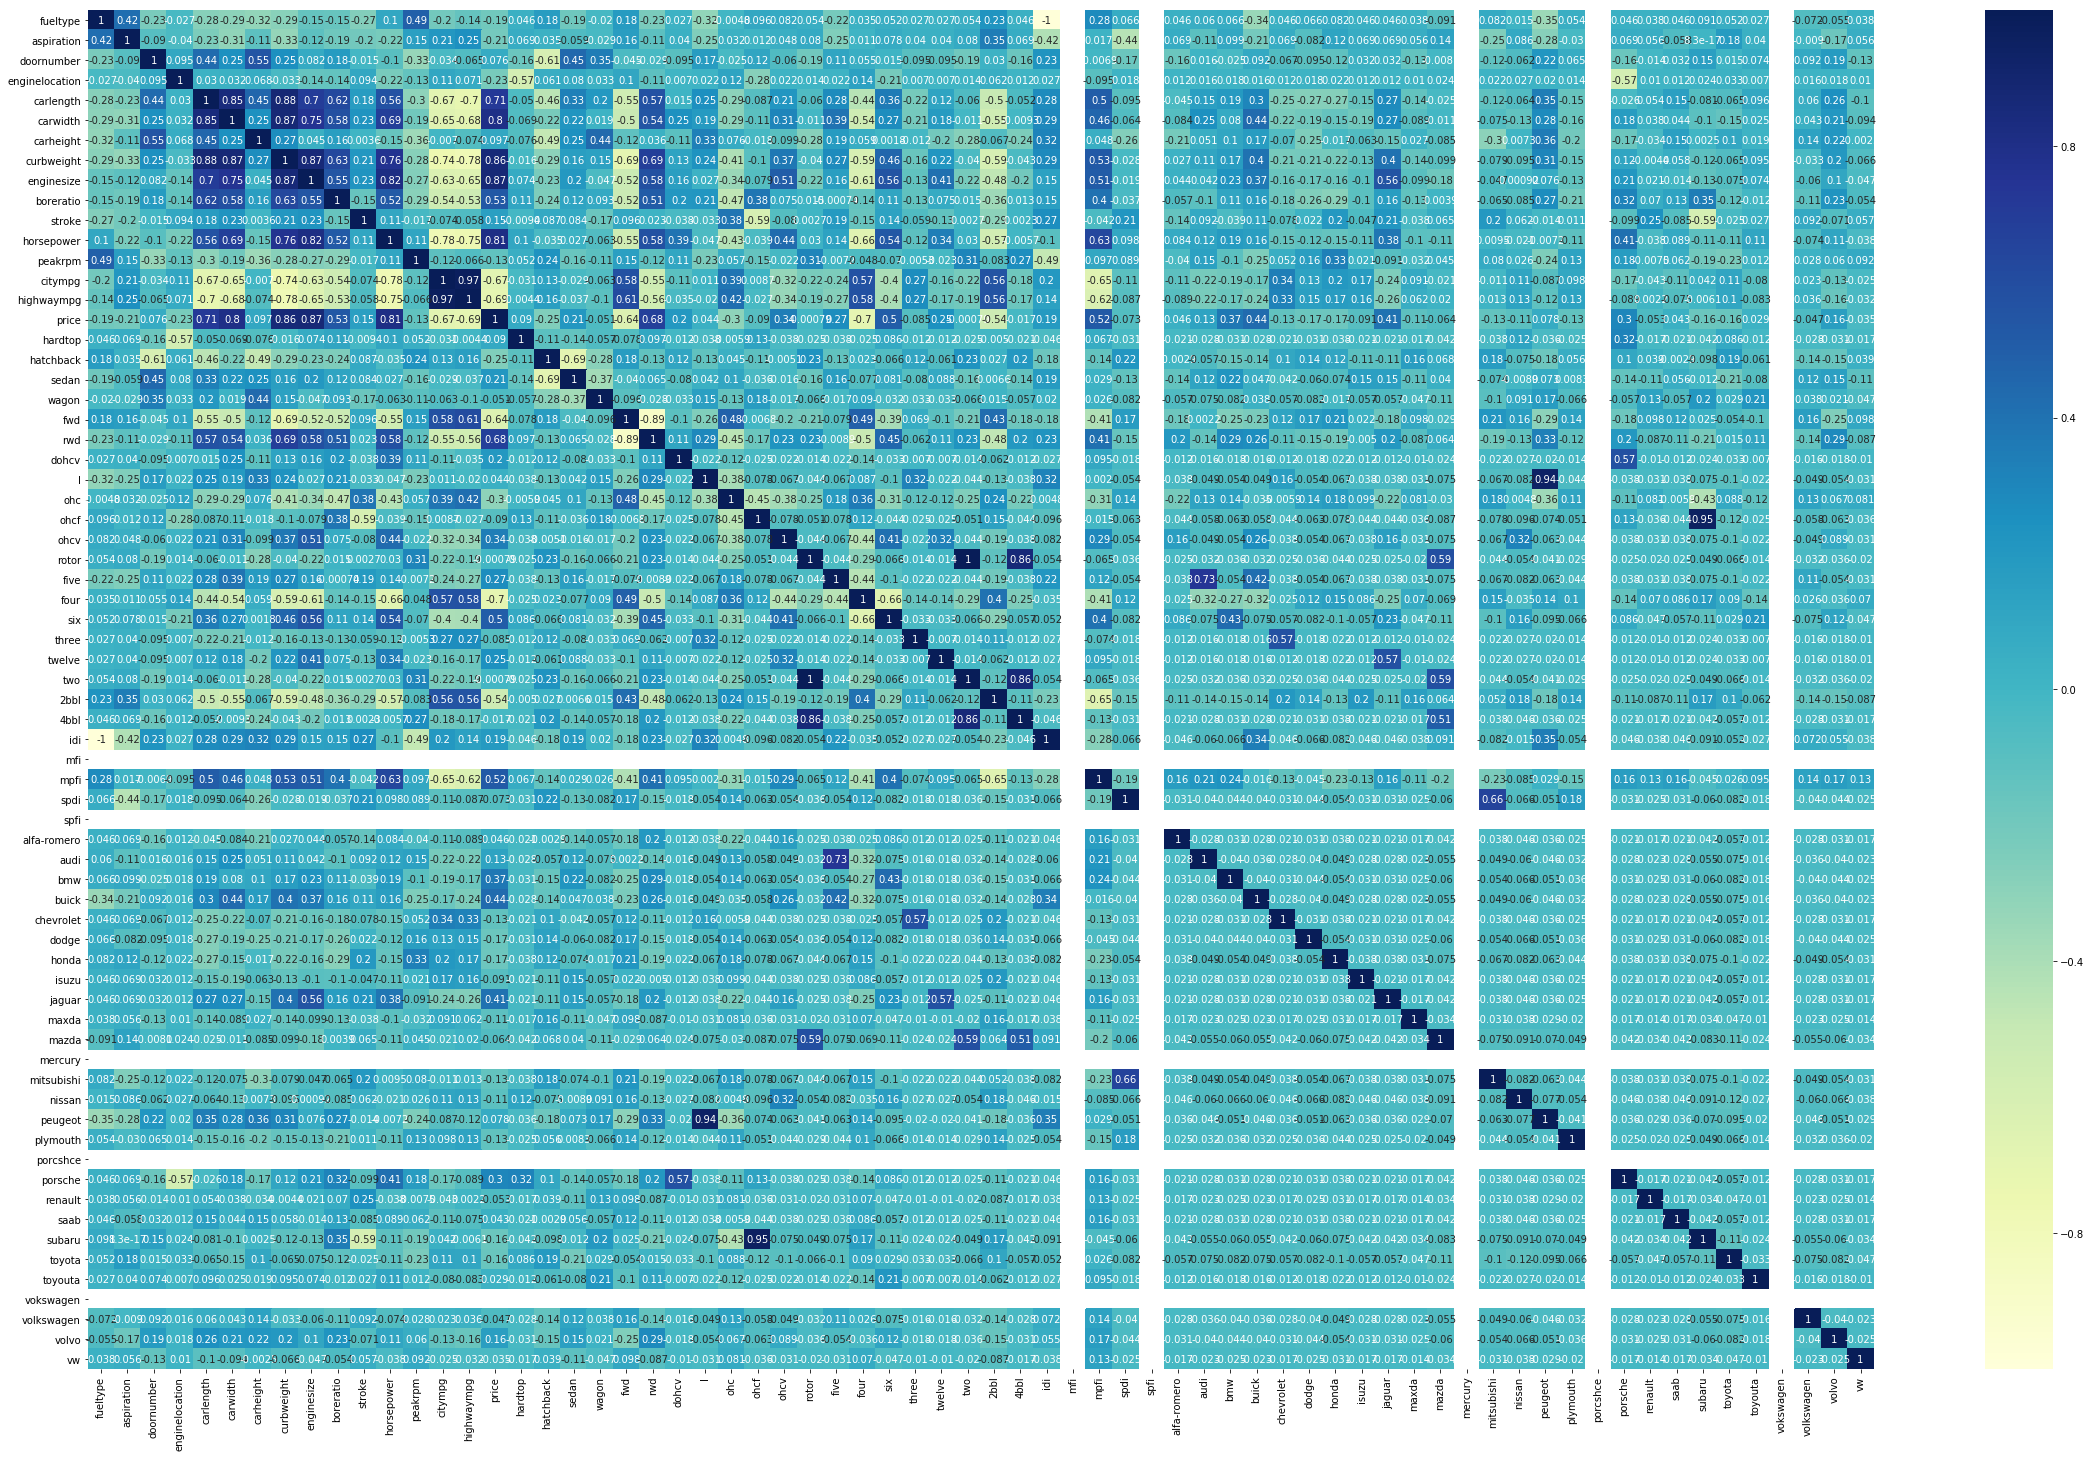

In [65]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Dividing into X and Y sets for the model building

In [66]:
y_train = df_train.pop('price')
X_train = df_train

Step 5: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, We need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [67]:
# Check all the columns of the dataframe

carprice.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo',
       'vw'],
      dtype='object')

In [ ]:
Step 5: Training the model

RFE(Recursive Feature Elimination)
As we can see there are many columns in the dataframe.Analysing all the variables and dropping a variable one by one will be time consuming, So we will use RFE(Recursive Feature Elimination) method here to find out the top n significant variable which are useful for our regression model.

In [68]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [131]:
# Runing RFE with the output numner of variable equal to 3
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 3)
rfe = rfe.fit(X_train, y_train)

In [123]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 50),
 ('aspiration', False, 18),
 ('doornumber', False, 49),
 ('enginelocation', True, 1),
 ('carlength', False, 37),
 ('carwidth', True, 1),
 ('carheight', False, 22),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 6),
 ('stroke', False, 8),
 ('horsepower', False, 14),
 ('peakrpm', False, 16),
 ('citympg', False, 29),
 ('highwaympg', False, 28),
 ('hardtop', False, 42),
 ('hatchback', False, 41),
 ('sedan', False, 43),
 ('wagon', False, 44),
 ('fwd', False, 58),
 ('rwd', False, 46),
 ('dohcv', False, 17),
 ('l', False, 13),
 ('ohc', False, 54),
 ('ohcf', False, 25),
 ('ohcv', False, 33),
 ('rotor', False, 4),
 ('five', False, 11),
 ('four', False, 10),
 ('six', False, 30),
 ('three', False, 3),
 ('twelve', False, 7),
 ('two', False, 9),
 ('2bbl', False, 45),
 ('4bbl', False, 39),
 ('idi', False, 61),
 ('mfi', False, 55),
 ('mpfi', False, 63),
 ('spdi', False, 51),
 ('spfi', False, 56),
 ('alfa-romero', False, 40),
 ('audi', False, 48),
 

In [132]:
col=X_train.columns[rfe.support_]
col

Index(['enginelocation', 'curbweight', 'enginesize'], dtype='object')

Building model using statsmodel for the detailed statistics

In [140]:
# creating X_train dataframe with RFE selected Variable
X_train_rfe=X_train[col]

In [145]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [146]:
lm = sm.OLS(y_train,X_train_rfe).fit() # running the linear model

In [147]:
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     216.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.58e-52
Time:                        18:49:25   Log-Likelihood:                 141.03
No. Observations:                 143   AIC:                            -274.1
Df Residuals:                     139   BIC:                            -262.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2572      0.095      2.

In [148]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0           const  154.96
3      enginesize    4.19
2      curbweight    4.11
1  enginelocation    1.05

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [152]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

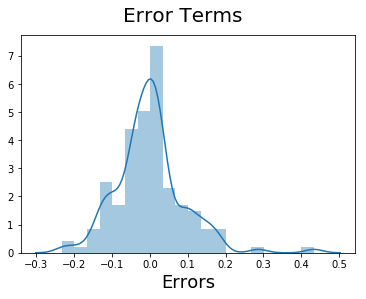

In [153]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

Applying the scaling on the test sets

In [154]:
num_vars = ['carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'horsepower',
           'peakrpm','citympg', 'highwaympg','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [155]:
df_test.describe()

fueltype  aspiration  doornumber  enginelocation  carlength  \
count  62.000000   62.000000   62.000000       62.000000  62.000000   
mean    0.887097    0.822581    0.564516        0.967742   0.559481   
std     0.319058    0.385142    0.499868        0.178127   0.189947   
min     0.000000    0.000000    0.000000        0.000000   0.056911   
25%     1.000000    1.000000    0.000000        1.000000   0.459350   
50%     1.000000    1.000000    1.000000        1.000000   0.547967   
75%     1.000000    1.000000    1.000000        1.000000   0.719919   
max     1.000000    1.000000    1.000000        1.000000   1.089431   

        carwidth  carheight  curbweight  enginesize  boreratio  ...  \
count  62.000000  62.000000   62.000000   62.000000  62.000000  ...   
mean    0.480376   0.559663    0.428470    0.265673   0.556580  ...   
std     0.165440   0.215811    0.179488    0.162820   0.228484  ...   
min     0.183333   0.141593    0.128394    0.067925  -0.111111  ...   
25%     0.358333   0.384956    0.305275    0.177358   0.404762  ...   
50%     0.441667   0.588496    0.406129    0.226415   0.563492  ...   
75%     0.516667   0.699115    0.564876    0.316038   0.746032  ...   
max     0.975000   1.061947    0.935609    0.932075   0.888889  ...   

         porsche  renault       saab     subaru     toyota  toyouta  \
count  62.000000     62.0  62.000000  62.000000  62.000000     62.0   
mean    0.016129      0.0   0.048387   0.016129   0.193548      0.0   
std     0.127000      0.0   0.216335   0.127000   0.398304      0.0   
min     0.000000      0.0   0.000000   0.000000   0.000000      0.0   
25%     0.000000      0.0   0.000000   0.000000   0.000000      0.0   
50%     0.000000      0.0   0.000000   0.000000   0.000000      0.0   
75%     0.000000      0.0   0.000000   0.000000   0.000000      0.0   
max     1.000000      0.0   1.000000   1.000000   1.000000      0.0   

       vokswagen  volkswagen      volvo    vw  
count  62.000000   62.000000  62.000000  62.0  
mean    0.016129    0.064516   0.080645   0.0  
std     0.127000    0.247676   0.274512   0.0  
min     0.000000    0.000000   0.000000   0.0  
25%     0.000000    0.000000   0.000000   0.0  
50%     0.000000    0.000000   0.000000   0.0  
75%     0.000000    0.000000   0.000000   0.0  
max     1.000000    1.000000   1.000000   0.0  

[8 rows x 68 columns]

Dividing into X_test and y_test

In [156]:
y_test = df_test.pop('price')
X_test = df_test

In [157]:
# Adding constant variable to test dataframe
X_test_rfe = sm.add_constant(X_test)

In [165]:
# Creating X_test_rfe dataframe by keeping only those variables from X_test_rfe which are present in X_train_rfe

X_test_rfe = X_test_rfe.drop(['fueltype', 'aspiration', 'doornumber', 'carlength',
       'carwidth', 'carheight', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], axis = 1)

In [167]:
# Making predictions using the  model

y_pred = lm.predict(X_test_rfe)

Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

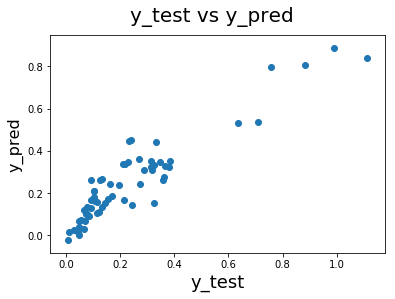

In [169]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [170]:
lm.params

const             0.257192
enginelocation   -0.387510
curbweight        0.504928
enginesize        0.584081
dtype: float64

We can see that the equation of our best fitted line is:
𝑝𝑟𝑖𝑐𝑒= 0.257+(-0.387*enginelocation)+(0.504*curbweight)+(0.584*enginesize)

Finally we have made a good multiple linear regression model, but we can add few more variables to do better.